
# Parameters

Modellen geven zoals gezegd, een _wiskundige beschrijving_ van de manier waarop data in een bepaalde context (volgens ons) tot stand komen. Die beschrijving bestaat concreet uit een verzameling van
- _wiskundige functies_ ($f$) en 
- _argumenten_ ($a$) voor die functies

$$
\{f_1(a_{1,1}, a_{1,2}, \ldots), f_2(a_{2,1}, a_{2,2}, \ldots), \ldots\}
$$  

:::{note} 🌍
:icon: false
:class: simple 
In het airco voorbeeld, is er in het simpele model $d_i = b + e_i$ slechts één functie $f$ met twee argumenten ($b$ en $e_i$):

$$
d_i = f(b, e_i)
$$

met als simpele beschrijving:

$$
f(b, e_i) = b + e_i
$$
:::

We maken in machine learning een onderscheid tussen **twee types argumenten**:
1. _gekende_ waarden van inputvariabelen
2. _onbekende_ **parameters**

**Het objectief van machine learning is om de onbekende parameters te achterhalen. Parameters bepalen namelijk het numerieke patroon dat achter de datageneratie zit**. Dat patroon willen we te weten komen om voorspellingen over nieuwe data te kunnen maken. Dat gebeurt aan de hand van een bepaald leeralgoritme dat op zoek gaat naar de optimale oplossing voor de parameters.   

:::{note} 🌍
:icon: false
:class: simple 
In het simpele airco model heeft de modelfunctie $f(b, e_i)$ enkel _onbekende_ parameters als argumenten: $b$ en $e_i$. Om voorspellingen te maken over toekomstige data (ideale drempelwaarden) willen we "het patroon $b$" te weten komen aan de hand van de verzamelde data. In dit geval is de voorspelling voor $e_i$ altijd $0$ omdat we in het model hebben ingebouwd dat de verwachtte waarde $E(e_i) = 0$.

_Seizoensparameters_  
We zouden bij de keuze van ons model een stap verder kunnen gaan en veronderstellen dat er nog steeds een zelfde ideale drempelwaarde bestaat voor alle gebruikers,
maar dat die verschilt per seizoen (zie [datasimulatie](ml.ipynb#datasimulatie)). We passen het model dus aan door een _onbekend patroon over seizoenen_ inbouwen. We kunnen ons model dan als volgt uitdrukken:
$$
\begin{aligned}
d_{i,w} &= b_w + e_i \\
d_{i,l} &= b_l + e_i \\
d_{i,z} &= b_z + e_i \\
d_{i,h} &= b_h + e_i \\
E(e_i) &= 0
\end{aligned}
$$
waarbij $b_w$, $b_l$, $b_z$ en $b_h$ de seizoensspecifieke ideale drempelwaardes zijn voor, respectievelijk, winter, lente, zomer en herfst. Zij vormen de parameters die we te weten willen komen. Ze drukken het seizoensspecifieke patroon uit. We hebben in dit geval een complexere modelfunctie:

$$
f(b_w, b_l, b_z, b_h, e_i, S) = \begin{cases}
b_w + e_i & \text{if } S = \text{winter} \\
b_l + e_i & \text{if } S = \text{lente} \\
b_z + e_i & \text{if } S = \text{zomer} \\
b_h + e_i & \text{if } S = \text{herfst}
\end{cases}
$$

💡 Naast de onbekende functie-argumenten (of parameters) $b_w$, $b_l$, $b_z$, $b_h$ en $e_i$ krijgen we hier nu ook een voorbeeld van _gekend functie-argument_, namelijk het seizoen $S$ waarvan een bepaald datapunt afkomstig is.
:::
  
Parameters zijn onbekende functie-argumenten in de wiskundige beschrijving van de data die door ons model wordt gegeven.
(target-parameters)=  
- **Model parameters zijn het geheel van onbekende functie-argumenten in het model die afgeleid/geschat/geleerd dienen te worden uit de data.**
- **We achterhalen de optimale waarden voor model parameters aan de hand van een bepaald leeralgoritme.**
- **Model parameters bepalen de numerieke patronen die achter de datageneratie zit.**  
- **De hoeveelheid parameters in een model bepaalt de _modelcomplexiteit_.**   


![box](../../../img/all_models_are_wrong.jpg)  
  
Deze bekende uitspraak verwijst naar het feit dat we nooit in staat zijn om een volledig juiste theorie te hebben over hoe data tot stand zijn gekomen. En als we die al zouden hebben, zou die zoveel parameters bevatten dat we nooit voldoende data kunnen verzamelen om die allemaal voldoende betrouwbaar te schatten via ons leeralgoritme.  
  
Hoe complex we ons model _kunnen_ maken, hangt af van de hoeveelheid beschikbare data/informatie.  
Het kan zijn dat bepaalde informatie gewoonweg niet beschikbaar is.  

:::{note} 🌍
:icon: false
:class: simple 
Stel dat we in het geval de airco niet beschikken over tijdsinformatie, dan kunnen we gewoonweg seizoensinformatie niet in rekening brengen in ons model.
:::

Anderzijds, kan het zijn dat we gewoonweg over _te weinig observaties of metingen beschikken_ om een _betrouwbare_ schatting te maken. Zie illustratie van de _Law of large numbers_.

Hoe complex we ons model _willen_ maken, hangt af van de _use case_.
Zeker in een product-context, is het algemeen aangeraden om zuinig te zijn met parameters:
- Je moet meer data verzamelen vooraleer je kan beginnen leren (trainen)
- Het leerproces (training) wordt complexer en onstabieler

(target-large-numbers)=
:::{tip} Illustratie
:class: simple
Stel dat we het werkelijke (of populatie-)gemiddelde van een bepaalde variabele willen _schatten_ aan de hand van een steekproef van waarden. Deze illustratie toont hoe het steekproefgemiddelde convergeert naar het populatiegemiddelde naarmate de steekproefgrootte toeneemt. Dit fundamentele concept staat bekend als de _Law of Large Numbers_. Het toont het belang aan van steekproefgroottes om _betrouwbare_ schattingen te maken op basis van data.

Kernconcepten:
- Populatiegemiddelde (μ): Het werkelijke gemiddelde van de gehele populatie
- Steekproefgemiddelde (x̄): Het gemiddelde van een eindige steekproef uit de populatie
- Convergentie: Naarmate de steekproefgrootte toeneemt, benadert het steekproefgemiddelde het populatiegemiddelde

De visualisatie hieronder toont:
- Linker paneel: Een hypothetische Gauss verdeling die aan de basis ligt van de observaties
- Rechter paneel: Hoe het cumulatieve steekproefgemiddelde convergeert naar het werkelijke populatiegemiddelde
:::

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Set style for better-looking plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

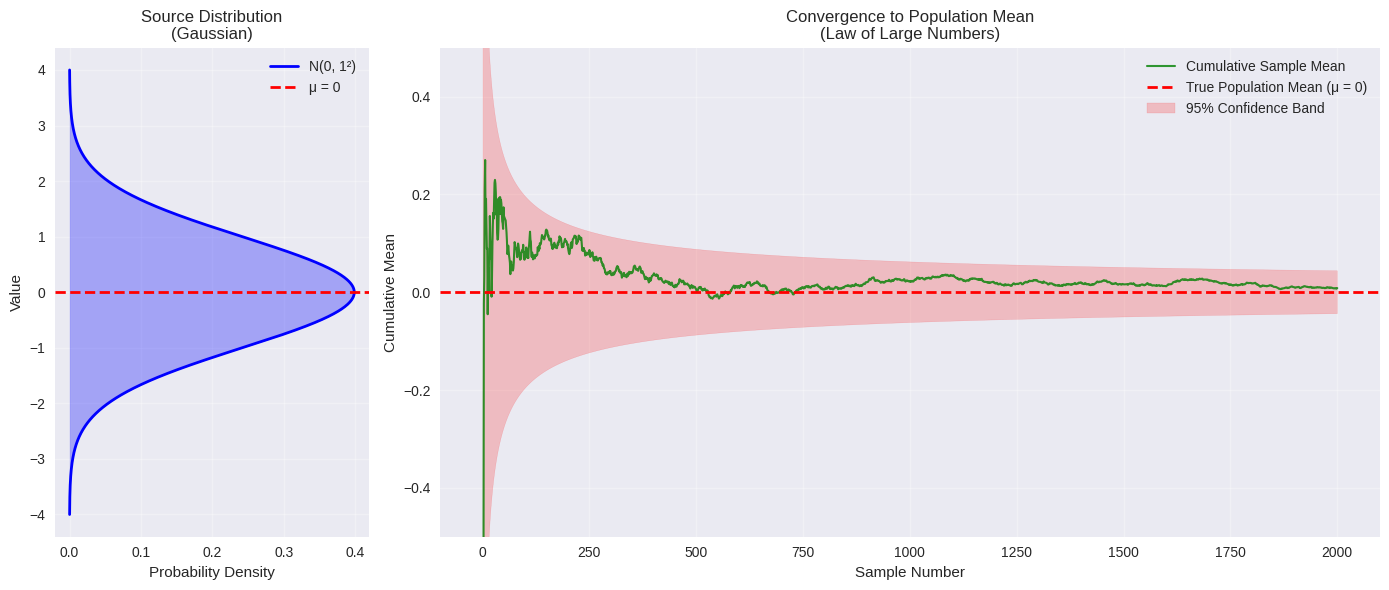

📊 Statistics after 2000 samples:
   True population mean (μ): 0
   Final sample mean: 0.0085
   Difference from true mean: 0.0085
   Standard error: 0.0224


In [2]:
# Parameters for the Gaussian distribution
mu = 0  # Population mean
sigma = 1  # Population standard deviation
n_samples = 2000  # Number of samples to draw

# Set random seed for reproducibility using np.random.Generator
rng = np.random.default_rng(123)

# Generate random samples from the Gaussian distribution
samples = rng.normal(mu, sigma, n_samples)

# Calculate cumulative mean
cumulative_mean = np.cumsum(samples) / np.arange(1, n_samples + 1)

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 3]})

# Left panel: Show the source distribution (rotated)
y_range = np.linspace(-4, 4, 1000)
pdf_values = stats.norm.pdf(y_range, mu, sigma)

ax1.plot(pdf_values, y_range, "b-", linewidth=2, label=f"N({mu}, {sigma}²)")
ax1.fill_betweenx(y_range, 0, pdf_values, alpha=0.3, color="blue")
ax1.axhline(y=mu, color="red", linestyle="--", linewidth=2, label=f"μ = {mu}")
ax1.set_xlabel("Probability Density")
ax1.set_ylabel("Value")
ax1.set_title("Source Distribution\n(Gaussian)")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right panel: Show convergence of sample mean
sample_numbers = np.arange(1, n_samples + 1)

ax2.plot(
    sample_numbers, cumulative_mean, "g-", linewidth=1.5, label="Cumulative Sample Mean", alpha=0.8
)
ax2.axhline(
    y=mu, color="red", linestyle="--", linewidth=2, label=f"True Population Mean (μ = {mu})"
)

# Add confidence bands (theoretical standard error)
theoretical_se = sigma / np.sqrt(sample_numbers)
ax2.fill_between(
    sample_numbers,
    mu - 1.96 * theoretical_se,
    mu + 1.96 * theoretical_se,
    alpha=0.2,
    color="red",
    label="95% Confidence Band",
)

ax2.set_xlabel("Sample Number")
ax2.set_ylabel("Cumulative Mean")
ax2.set_title("Convergence to Population Mean\n(Law of Large Numbers)")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Set y-axis limits to show convergence clearly
ax2.set_ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"📊 Statistics after {n_samples} samples:")
print(f"   True population mean (μ): {mu}")
print(f"   Final sample mean: {cumulative_mean[-1]:.4f}")
print(f"   Difference from true mean: {abs(cumulative_mean[-1] - mu):.4f}")
print(f"   Standard error: {sigma / np.sqrt(n_samples):.4f}")

## _Over fitting_
Als we meer parameters aan een model toevoegen, stellen we het in theorie in staat om steeds complexere patronen te leren. Maar het volume van de trainingsdata gelijk blijft, geven we het model bij elke nieuwe parameter een extra gelegenheid om de data _in zijn geheel_ als patroon te leren. Als er in het extreme geval uiteindelijk evenveel of meer parameters zijn als trainingsdata, leert het model de trainingsdata 100% accuraat te voorspellen omdat het de data van buiten kent, maar wanneer het geconfronteerd wordt met nieuwe data, gaat het volledig de mist in omdat het ook enkel de trainingsdata kent. 

(target-over-fitting)=
Het fenomeen waarbij **de verhouding tussen het aantal model parameters en de hoeveelheid trainingsdata te groot wordt, waardoor het model enkel goed presteert op eerder geziene data, heet _over fitting_**.
  
:::{note} 🌍 Over fitting
:icon: false
:class: simple
De illustratie hieronder geeft weer wat er gebeurt wanneer we bij een {ref}`lineair regressie <target-coffee-simulation>`, slechts twee datapunten zouden gebruiken om twee parameters te schatten (_bias_ en _slope_). In dat geval leert het model perfect de training data te voorspellen ($R^2=1$; {ref}`zie <target-r2>`), maar het is duidelijk dat het geleerde patroon helemaal niet overeenkomt met de realiteit.
:::

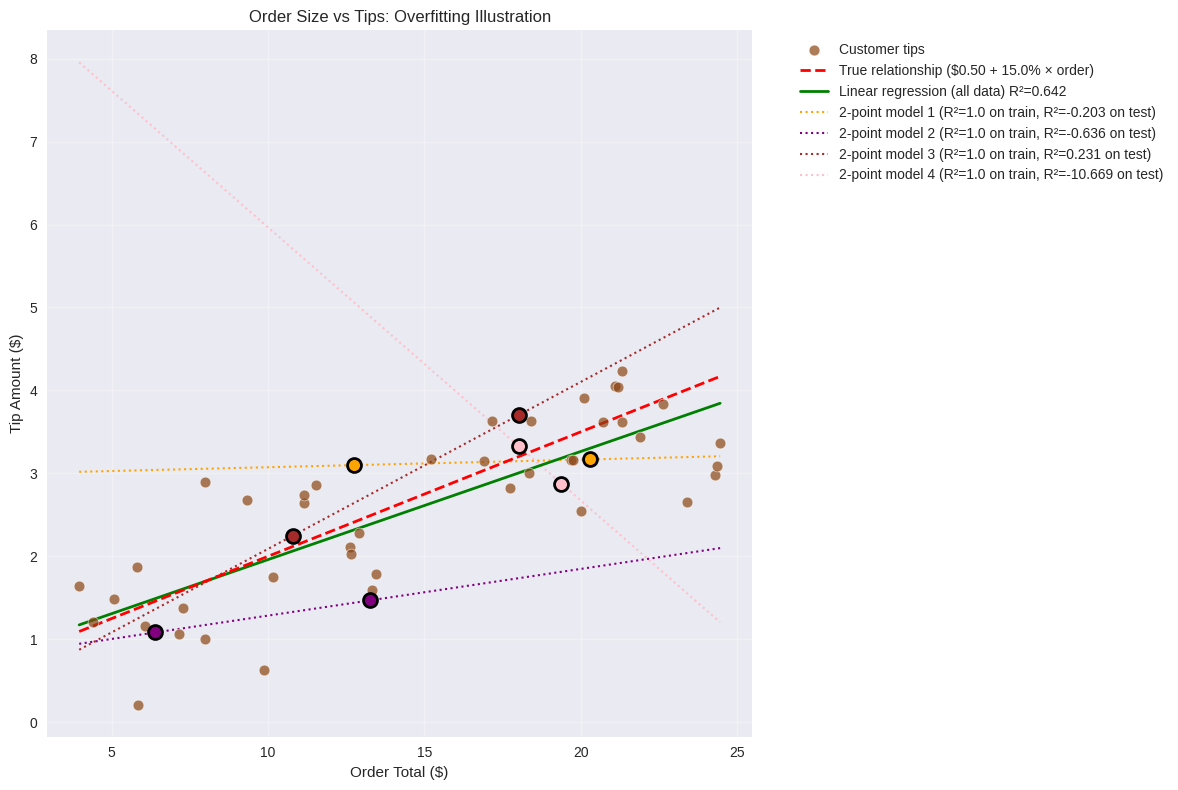

In [ ]:
from sklearn.metrics import r2_score

from ml_courses.sim.monte_carlo_tips import MonteCarloTipsSimulation

sim = MonteCarloTipsSimulation(noise_std=0.8)


# Linear regression function
def linear_regression(x, y):
    """Calculate linear regression parameters using least squares."""
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    b2 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b1 = y_mean - b2 * x_mean

    return b1, b2


# Calculate R² for training and test data
def calculate_r2(y_true, y_pred):
    """Calculate R² coefficient of determination."""
    return r2_score(y_true, y_pred)


# Plot the coffee shop data with overfitting illustration
plt.figure(figsize=(12, 8))

# Plot customer tips
plt.scatter(
    sim.order_totals,
    sim.observed_tips,
    alpha=0.7,
    color="saddlebrown",
    s=60,
    edgecolor="white",
    linewidth=0.5,
    label="Customer tips",
    zorder=5,
)

# True relationship line
plt.plot(
    sim.order_totals,
    sim.true_tips,
    "r--",
    linewidth=2,
    label=f"True relationship (${sim.true_b1:.2f} + {sim.true_b2:.1%} × order)",
    zorder=4,
)

# Linear regression on all data
b1_all, b2_all = linear_regression(sim.order_totals, sim.observed_tips)
tips_pred_all = b1_all + b2_all * sim.order_totals
r2_all = calculate_r2(sim.observed_tips, tips_pred_all)

plt.plot(
    sim.order_totals,
    tips_pred_all,
    "g-",
    linewidth=2,
    label=f"Linear regression (all data) R²={r2_all:.3f}",
    zorder=3,
)

# Multiple 2-point regression lines to illustrate overfitting
rng = np.random.default_rng(67)
colors = ["orange", "purple", "brown", "pink"]

for i in range(4):
    # Randomly select 2 points
    indices = rng.choice(len(sim.order_totals), 2, replace=False)
    x_train = sim.order_totals[indices]
    y_train = sim.observed_tips[indices]

    # Fit linear regression on 2 points
    b1_2pt, b2_2pt = linear_regression(x_train, y_train)

    # Calculate predictions on all data
    tips_pred_2pt = b1_2pt + b2_2pt * sim.order_totals

    # Calculate R² on training data (will be 1.0)
    r2_train = calculate_r2(y_train, b1_2pt + b2_2pt * x_train)

    # Calculate R² on all data (will be low)
    r2_test = calculate_r2(sim.observed_tips, tips_pred_2pt)

    # Plot the 2-point regression line
    plt.plot(
        sim.order_totals,
        tips_pred_2pt,
        linestyle=":",
        color=colors[i],
        linewidth=1.5,
        label=f"2-point model {i + 1} (R²={r2_train:.1f} on train, R²={r2_test:.3f} on test)",
        zorder=2,
    )

    # Highlight the training points
    plt.scatter(x_train, y_train, color=colors[i], s=100, edgecolor="black", linewidth=2, zorder=6)

plt.xlabel("Order Total ($)")
plt.ylabel("Tip Amount ($)")
plt.title("Order Size vs Tips: Overfitting Illustration")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()